In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import featuretools as ft
from catboost import CatBoostClassifier

In [3]:
missing_values = ["n/a", "na", "--"]
df = pd.read_csv("trainTitanic.csv", na_values = missing_values)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
print("Table Missing values:")
print("--------------------------")
# print(df.apply(lambda x: sum(x.isnull()),axis=0))
print(df.isnull().sum())

Table Missing values:
--------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# df["Embarked"].mode()
df[df["Embarked"].isnull()]
df["Embarked"].fillna("S",inplace=True)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
df = df.drop("Cabin",1)

In [10]:
df.isnull().sum()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [11]:
from sklearn.preprocessing import LabelEncoder
col_mod = ["Pclass","Sex","Embarked"]
le = LabelEncoder()
for i in col_mod:
  df[i] = le.fit_transform(df[i])
df.dtypes
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [12]:
# df.iloc[:,1:3]
# Age_df = df[["Survived","Sex","Pclass","SibSp","Parch","Embarked"]]
Age_df = df.dropna()

In [13]:
correlation = df[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]].corr()
correlation

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.030394
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.030394,0.068230,0.039798,-0.224719,1.000000


In [14]:
mean = df["Age"].mean()
std = df["Age"].std()
is_null = df["Age"].isnull().sum()
randomAgeFill = np.random.randint(mean - std, mean + std, size = is_null)
randomAgeFill

array([15, 22, 16, 30, 19, 16, 36, 39, 38, 24, 24, 35, 22, 15, 20, 31, 28,
       43, 19, 17, 25, 38, 29, 26, 33, 33, 23, 40, 25, 30, 39, 23, 30, 31,
       31, 25, 16, 16, 29, 42, 37, 22, 35, 20, 29, 36, 42, 15, 37, 19, 17,
       17, 39, 16, 33, 21, 33, 37, 41, 17, 23, 40, 32, 16, 27, 36, 43, 32,
       23, 29, 17, 27, 20, 35, 33, 24, 20, 34, 28, 19, 15, 18, 43, 34, 39,
       40, 17, 16, 27, 17, 34, 37, 17, 28, 17, 19, 25, 29, 16, 20, 15, 22,
       28, 42, 39, 21, 28, 15, 26, 20, 37, 40, 27, 29, 17, 33, 29, 39, 25,
       36, 32, 17, 24, 32, 19, 31, 40, 27, 23, 38, 35, 40, 29, 18, 27, 42,
       36, 33, 34, 16, 24, 29, 24, 27, 34, 34, 16, 43, 16, 34, 43, 24, 28,
       25, 28, 27, 35, 41, 34, 34, 26, 35, 16, 18, 19, 26, 23, 17, 42, 24,
       21, 41, 17, 19, 26, 30, 33])

In [15]:
df.loc[pd.isnull(df['Age']),'Age'] = randomAgeFill

In [16]:
df["Age"].astype("int64")
df.dtypes
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
5,6,0,2,"Moran, Mr. James",1,15.0,0,0,330877,8.4583,1
6,7,0,0,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,2
7,8,0,2,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,2
8,9,1,2,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,2
9,10,1,1,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0


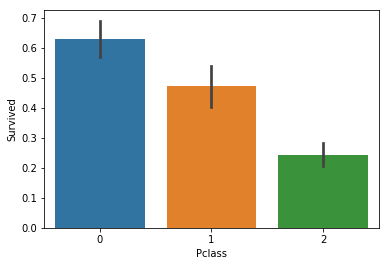

In [18]:
sns.barplot(x='Pclass',y='Survived',data = df)

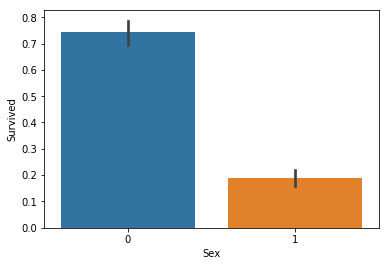

In [19]:
sns.barplot(x='Sex',y='Survived',data = df)

In [20]:
test_x_df = df[["Sex","Pclass","Age","SibSp","Parch","Embarked"]]
test_y_df = df["Survived"]

In [21]:
xTrain,xTest,yTrain,yTest = train_test_split(test_x_df,test_y_df,test_size=0.25,random_state=0)
yTest

495    0
648    0
278    0
31     1
255    1
298    1
609    1
318    1
484    1
367    1
704    0
346    1
196    0
535    1
310    1
14     0
350    0
145    0
614    0
803    1
144    0
708    1
778    0
270    0
474    0
319    1
519    0
141    1
880    1
642    0
      ..
727    1
428    0
54     0
45     0
172    1
447    1
597    0
204    1
240    0
672    0
39     1
283    1
308    0
18     0
769    0
156    1
482    0
210    0
647    1
50     0
852    0
239    0
646    0
122    0
788    1
167    0
306    1
379    0
742    1
10     1
Name: Survived, Length: 223, dtype: int64

In [22]:
logReg = LogisticRegression()
logReg.fit(xTrain,yTrain)
y_pred = logReg.predict(xTest)
y_pred

/media/abhishek/Drive/titanic/titanic/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

In [23]:
logistic_train_accuracy = round(logReg.score(xTrain,yTrain)*100,2)
logistic_test_accuracy = round(logReg.score(xTest,yTest)*100,2)
print("logistic_train_accuracy :" + str(logistic_train_accuracy))
print("logistic_test_accuracy :" + str(logistic_test_accuracy))

logistic_train_accuracy :79.64
logistic_test_accuracy :78.48


In [24]:
forest = RandomForestClassifier()
forest.fit(xTrain,yTrain)
y_pred_forest = forest.predict(xTest)
y_pred_forest

/media/abhishek/Drive/titanic/titanic/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1])

In [25]:
forest_train_accuracy = round(forest.score(xTrain,yTrain)*100,2)
forest_test_accuracy = round(forest.score(xTest,yTest)*100)
print("forest_train_accuracy :" + str(forest_train_accuracy))
print("forest_test_accuracy :" + str(forest_test_accuracy))

forest_train_accuracy :94.16
forest_test_accuracy :79.0


In [26]:
for index,row in df.iterrows():
  if row['Age'] == 0.42:
    print(row)

PassengerId                                804
Survived                                     1
Pclass                                       2
Name           Thomas, Master. Assad Alexander
Sex                                          1
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Embarked                                     0
Name: 803, dtype: object


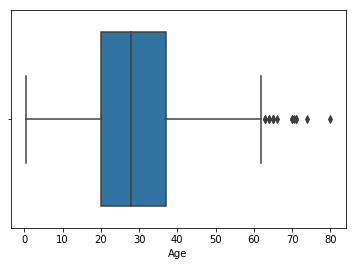

In [27]:
sns.boxplot(x=df['Age'])

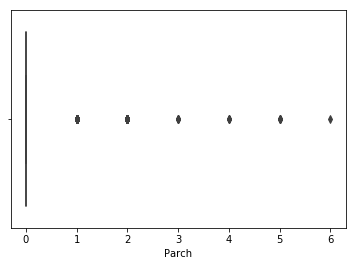

In [28]:
sns.boxplot(x=df['Parch'])

In [29]:
IQR_df = df[["Age","Sex","Pclass","SibSp","Parch","Fare","Embarked","Survived"]]
IQR_df

,Age,Sex,Pclass,SibSp,Parch,Fare,Embarked,Survived
0,22.0,1,2,1,0,7.2500,2,0
1,38.0,0,0,1,0,71.2833,0,1
2,26.0,0,2,0,0,7.9250,2,1
3,35.0,0,0,1,0,53.1000,2,1
4,35.0,1,2,0,0,8.0500,2,0
5,15.0,1,2,0,0,8.4583,1,0
6,54.0,1,0,0,0,51.8625,2,0
7,2.0,1,2,3,1,21.0750,2,0
8,27.0,0,2,0,2,11.1333,2,1
9,14.0,0,1,1,0,30.0708,0,1


In [30]:
Q1 = IQR_df.quantile(0.25)
Q3 = IQR_df.quantile(0.75)
IQR = Q3-Q1
IQR

Age         17.0000
Sex          1.0000
Pclass       1.0000
SibSp        1.0000
Parch        0.0000
Fare        23.0896
Embarked     1.0000
Survived     1.0000
dtype: float64

In [31]:
print((IQR_df< (Q1 - 1.5 * IQR)) |(IQR_df> (Q3 + 1.5 * IQR)))

       Age    Sex  Pclass  SibSp  Parch   Fare  Embarked  Survived
0    False  False   False  False  False  False     False     False
1    False  False   False  False  False   True     False     False
2    False  False   False  False  False  False     False     False
3    False  False   False  False  False  False     False     False
4    False  False   False  False  False  False     False     False
5    False  False   False  False  False  False     False     False
6    False  False   False  False  False  False     False     False
7    False  False   False   True   True  False     False     False
8    False  False   False  False   True  False     False     False
9    False  False   False  False  False  False     False     False
10   False  False   False  False   True  False     False     False
11   False  False   False  False  False  False     False     False
12   False  False   False  False  False  False     False     False
13   False  False   False  False   True  False     False     F

In [32]:
outlier_out_df = IQR_df[~((IQR_df < (Q1 - 1.5 * IQR)) |(IQR_df > (Q3 + 1.5 * IQR))).any(axis=1)]
outlier_out_df.shape

(596, 8)

In [33]:
outlier_x_df = outlier_out_df[["Age","Sex","Pclass","SibSp","Parch","Fare","Embarked"]]
outlier_y_df = outlier_out_df[["Survived"]]
outlier_xTrain,outlier_xTest,outlier_yTrain,outlier_yTest = train_test_split(outlier_x_df,outlier_y_df,test_size=0.2,random_state=0)
logReg.fit(outlier_xTrain,outlier_yTrain)

/media/abhishek/Drive/titanic/titanic/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/media/abhishek/Drive/titanic/titanic/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
logistic_train_accuracy_1 = round(logReg.score(outlier_xTrain,outlier_yTrain)*100,2)
logistic_test_accuracy_1 = round(logReg.score(outlier_xTest,outlier_yTest)*100,2)
print("logistic_train_accuracy :" + str(logistic_train_accuracy_1))
print("logistic_test_accuracy :" + str(logistic_test_accuracy_1))

logistic_train_accuracy :80.88
logistic_test_accuracy :80.83


In [35]:
forest.fit(outlier_xTrain,outlier_yTrain)

/media/abhishek/Drive/titanic/titanic/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
forest_train_accuracy_1 = round(forest.score(outlier_xTrain,outlier_yTrain)*100,2)
forest_test_accuracy_1 = round(forest.score(outlier_xTest,outlier_yTest)*100)
print("forest_train_accuracy :" + str(forest_train_accuracy_1))
print("forest_test_accuracy :" + str(forest_test_accuracy_1))

forest_train_accuracy :97.48
forest_test_accuracy :81.0


In [43]:
es = ft.EntitySet(id='survival')
es.entity_from_dataframe(entity_id='titanic',dataframe = df,index='PassengerId')
es.normalize_entity(base_entity_id='titanic', new_entity_id='ticket', index = 'Ticket')

Entityset: survival
  Entities:
    titanic [Rows: 891, Columns: 11]
    ticket [Rows: 681, Columns: 1]
  Relationships:
    titanic.Ticket -> ticket.Ticket

In [162]:
feature_matrix, feature_names = ft.dfs(entityset=es, 
target_entity = 'titanic', 
max_depth = 2, 
verbose = 1, 
n_jobs = 2)

Built 61 features
EntitySet scattered to workers in 4.450 seconds
Elapsed: 00:03 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


In [163]:
feature_matrix.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'ticket.SUM(titanic.Survived)',
       'ticket.SUM(titanic.Pclass)', 'ticket.SUM(titanic.Sex)',
       'ticket.SUM(titanic.Age)', 'ticket.SUM(titanic.SibSp)',
       'ticket.SUM(titanic.Parch)', 'ticket.SUM(titanic.Fare)',
       'ticket.SUM(titanic.Embarked)', 'ticket.STD(titanic.Survived)',
       'ticket.STD(titanic.Pclass)', 'ticket.STD(titanic.Sex)',
       'ticket.STD(titanic.Age)', 'ticket.STD(titanic.SibSp)',
       'ticket.STD(titanic.Parch)', 'ticket.STD(titanic.Fare)',
       'ticket.STD(titanic.Embarked)', 'ticket.MAX(titanic.Survived)',
       'ticket.MAX(titanic.Pclass)', 'ticket.MAX(titanic.Sex)',
       'ticket.MAX(titanic.Age)', 'ticket.MAX(titanic.SibSp)',
       'ticket.MAX(titanic.Parch)', 'ticket.MAX(titanic.Fare)',
       'ticket.MAX(titanic.Embarked)', 'ticket.SKEW(titanic.Survived)',
       'ticket.SKEW(titanic.Pclass)', 'ticket.SKEW(titanic.Sex)',
       't

In [164]:
feature_matrix.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,ticket.MEAN(titanic.Pclass),ticket.MEAN(titanic.Sex),ticket.MEAN(titanic.Age),ticket.MEAN(titanic.SibSp),ticket.MEAN(titanic.Parch),ticket.MEAN(titanic.Fare),ticket.MEAN(titanic.Embarked),ticket.COUNT(titanic),ticket.NUM_UNIQUE(titanic.Name),ticket.MODE(titanic.Name)
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,...,2,1.0,22.0,1.0,0.0,7.2500,2.0,1,1,"Braund, Mr. Owen Harris"
2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,...,0,0.0,38.0,1.0,0.0,71.2833,0.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,...,2,0.0,26.0,0.0,0.0,7.9250,2.0,1,1,"Heikkinen, Miss. Laina"
4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,...,0,0.5,36.0,1.0,0.0,53.1000,2.0,2,2,"Futrelle, Mr. Jacques Heath"
5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,...,2,1.0,35.0,0.0,0.0,8.0500,2.0,1,1,"Allen, Mr. William Henry"


In [165]:
feature_matrix.dtypes

Survived                             int64
Pclass                               int64
Name                                object
Sex                                  int64
Age                                float64
SibSp                                int64
Parch                                int64
Ticket                              object
Fare                               float64
Embarked                             int64
ticket.SUM(titanic.Survived)         int64
ticket.SUM(titanic.Pclass)           int64
ticket.SUM(titanic.Sex)              int64
ticket.SUM(titanic.Age)            float64
ticket.SUM(titanic.SibSp)            int64
ticket.SUM(titanic.Parch)            int64
ticket.SUM(titanic.Fare)           float64
ticket.SUM(titanic.Embarked)         int64
ticket.STD(titanic.Survived)       float64
ticket.STD(titanic.Pclass)         float64
ticket.STD(titanic.Sex)            float64
ticket.STD(titanic.Age)            float64
ticket.STD(titanic.SibSp)          float64
ticket.STD(

In [189]:
categorical_features = np.where(feature_matrix.dtypes == 'object')[0]

for i in categorical_features:
    feature_matrix.iloc[:,i].astype('str')

In [190]:
categorical_features

array([6])

In [185]:
feature_matrix.drop(['ticket.MODE(titanic.Name)'], axis =1,inplace = True)

In [200]:
feature_matrix.drop(['Ticket'],axis = 1, inplace = True)

In [213]:
feature_matrix.drop(['ticket.SKEW(titanic.Sex)','ticket.SKEW(titanic.Age)','ticket.SKEW(titanic.SibSp)','ticket.SKEW(titanic.Parch)','ticket.SKEW(titanic.Fare)','ticket.SKEW(titanic.Embarked)'],axis = 1, inplace = True)

In [215]:
feature_matrix.drop(['ticket.STD(titanic.Survived)','ticket.STD(titanic.Pclass)','ticket.STD(titanic.Sex)','ticket.STD(titanic.Age)','ticket.STD(titanic.SibSp)','ticket.STD(titanic.Parch)','ticket.STD(titanic.Fare)','ticket.STD(titanic.Embarked)'],axis = 1, inplace = True)

In [217]:
feature_matrix.isnull().sum()

Survived                           0
Pclass                             0
Sex                                0
Age                                0
SibSp                              0
Parch                              0
Fare                               0
Embarked                           0
ticket.SUM(titanic.Survived)       0
ticket.SUM(titanic.Pclass)         0
ticket.SUM(titanic.Sex)            0
ticket.SUM(titanic.Age)            0
ticket.SUM(titanic.SibSp)          0
ticket.SUM(titanic.Parch)          0
ticket.SUM(titanic.Fare)           0
ticket.SUM(titanic.Embarked)       0
ticket.MAX(titanic.Survived)       0
ticket.MAX(titanic.Pclass)         0
ticket.MAX(titanic.Sex)            0
ticket.MAX(titanic.Age)            0
ticket.MAX(titanic.SibSp)          0
ticket.MAX(titanic.Parch)          0
ticket.MAX(titanic.Fare)           0
ticket.MAX(titanic.Embarked)       0
ticket.MIN(titanic.Survived)       0
ticket.MIN(titanic.Pclass)         0
ticket.MIN(titanic.Sex)            0
t

In [218]:
test_x_AFE = feature_matrix.iloc[:,1:]
test_y_AFE = feature_matrix.iloc[:,0]

In [219]:
x_train_AFE, x_test_AFE, y_train_AFE, y_test_AFE = train_test_split(test_x_AFE, test_y_AFE, test_size=0.25, random_state=11)

In [223]:
logReg.fit(x_train_AFE,y_train_AFE)
y_pred_AFE = logReg.predict(x_test_AFE)
y_pred_AFE

/media/abhishek/Drive/titanic/titanic/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0])

In [222]:
logistic_train_accuracy_AFE = round(logReg.score(x_train_AFE,y_train_AFE)*100,2)
print("logistic_train_accuracy :" + str(logistic_train_accuracy_AFE))
logistic_test_accuracy_AFE = round(logReg.score(x_test_AFE,y_test_AFE)*100,2)
print("logistic_test_accuracy :" + str(logistic_test_accuracy_AFE))

logistic_train_accuracy :98.65
logistic_test_accuracy :99.1


In [224]:
forest.fit(x_train_AFE,y_train_AFE)
y_pred_forest_AFE = forest.predict(x_test_AFE)
y_pred_forest_AFE

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0])

In [225]:
forest_train_accuracy_AFE = round(forest.score(x_train_AFE,y_train_AFE)*100,2)
print("logistic_train_accuracy :" + str(forest_train_accuracy_AFE))
forest_test_accuracy_AFE = round(forest.score(x_test_AFE,y_test_AFE)*100,2)
print("logistic_test_accuracy :" + str(forest_test_accuracy_AFE))

logistic_train_accuracy :99.7
logistic_test_accuracy :98.21
